In [1]:
from pyrootmemo.fit.fit_xy_powerlaw import PowerlawFitWeibull
import numpy as np
from pyrootmemo.tools.helpers import units
import matplotlib.pyplot as plt

In [2]:
# generate data
rng = np.random.default_rng()
x = np.linspace(1, 5, 50)
y = 10 * x**(-0.5) * rng.uniform(0.5, 1.5, len(x))
w = np.ones(len(x))
# with units - generate
xu = x * units("mm")
yu = y * units("MPa")
# show
#print(x)
#print(y)

In [3]:
# Weibull
P = PowerlawFitWeibull(x, y)
print(P.colinear)
print(P.multiplier)
print(P.exponent)
print(P.shape)
print(P.x0)
print(P.y0)
print(P.random(np.array([2, 3, 4])))
print(P.ks_distance())
print(P.covariance())
print(P.covariance(method = 'bootstrap'))
print(P.confidence_interval())

False
9.790037378707908
-0.5452982902254239
4.066884720278219
1.0
1.0
[6.91086438 3.22045844 3.56905103]
0.9198672147630378
[[ 0.69036631 -0.05548898  0.06837566]
 [-0.05548898  0.00567319  0.001187  ]
 [ 0.06837566  0.001187    0.20183906]]
[[ 0.66575016 -0.05720341  0.11895056]
 [-0.05720341  0.00631126 -0.0050572 ]
 [ 0.11895056 -0.0050572   0.15614753]]
(array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
       1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
       1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
       2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
       2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  , 3.04, 3.08, 3.12, 3.16,
       3.2 , 3.24, 3.28, 3.32, 3.36, 3.4 , 3.44, 3.48, 3.52, 3.56, 3.6 ,
       3.64, 3.68, 3.72, 3.76, 3.8 , 3.84, 3.88, 3.92, 3.96, 4.  , 4.04,
       4.08, 4.12, 4.16, 4.2 , 4.24, 4.28, 4.32, 4.36, 4.4 , 4.44, 4.48,
       4.52, 4.56, 4.6 , 4.64, 4.68, 4.72, 4.76, 4.8 , 

In [4]:
# Weibull with units
Pu = PowerlawFitWeibull(xu, yu)
print(Pu.x0)
print(Pu.y0)
print(Pu.colinear)
print(Pu.multiplier)
print(Pu.exponent)
print(Pu.shape)
print(Pu.random(np.array([2, 3, 4]) * units("mm")))
print(Pu.ks_distance())
print(Pu.xrange())
print(Pu.predict())
print(Pu.get_scale(Pu.xrange()))
print(Pu.prediction_interval(level = 0.5))
print(Pu.covariance())
print(Pu.covariance(method = 'bootstrap'))
print(Pu.confidence_interval())


1.0 millimeter
1.0 megapascal
False
9.790037378707908 megapascal
-0.5452982902254239
4.066884720278219
[6.3640314433749 7.998490068869026 5.475258145790721] megapascal
0.9198672147630378
[1.0 1.04 1.08 1.12 1.16 1.2 1.24 1.28 1.32 1.3599999999999999 1.4 1.44 1.48 1.52 1.56 1.6 1.6400000000000001 1.6800000000000002 1.72 1.76 1.8 1.8399999999999999 1.88 1.92 1.96 2.0 2.04 2.08 2.12 2.16 2.2 2.24 2.2800000000000002 2.3200000000000003 2.3600000000000003 2.4000000000000004 2.44 2.48 2.52 2.56 2.6 2.64 2.6799999999999997 2.7199999999999998 2.76 2.8 2.84 2.88 2.92 2.96 3.0 3.04 3.08 3.12 3.16 3.2 3.24 3.2800000000000002 3.32 3.36 3.4 3.44 3.48 3.52 3.56 3.6 3.64 3.68 3.72 3.7600000000000002 3.8000000000000003 3.84 3.88 3.92 3.96 4.0 4.04 4.08 4.12 4.16 4.2 4.24 4.28 4.32 4.359999999999999 4.4 4.4399999999999995 4.48 4.52 4.5600000000000005 4.6 4.640000000000001 4.68 4.720000000000001 4.76 4.800000000000001 4.84 4.88 4.92 4.96 5.0] millimeter
[9.790037378707908 9.379953792689488 9.015085000222

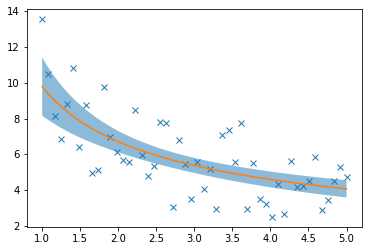

In [ ]:
# test with plot
xf = Pu.xrange()
yf = Pu.predict(xf)
xc,yc = Pu.confidence_interval()
plt.plot(Pu.x, Pu.y, 'x')
plt.plot(xf, yf, '-')
plt.fill_between(xc, *yc.transpose(), alpha = 0.5)